# Assignment 5: CRISP-DM Model with Titanic Dataset (max. 10 points)
## the practical "final project" of the AI/DA 1 module studies at JAMK

What you will do in this assignment: 

You will create small-scale CRISP-DM and data-based project.

Here is presented "the basic flow" of the project:

1. Loading **Titanic** dataset, and 
2. then extracting more information of the dataset and 
3. visualizing the results.
4. few Machine Learning models are applied to the dataset and 
5. the results of Machine Learning models are compared.

See **CRISP-DM process model** which we are applying in this assignment. 

### Add your information 

TODO: Add your names: 
* student_name = Maria Hiltunen
* student_id = AF0652



## Phase 1: Business Understanding (no points)

In this phase, you should define your project objectives and success criteria.

**Question**: You can think what these can be for this assignment?

Tehtävässä käytetty data on Titanicin matkustajatietoja. Data on Excel-muotoinen CSV-tiedosto, rakenteeltaan kaksiulotteinen matriisi. Datassa on 11 saraketta: 
1. selviytyminen
2. matkustajaluokka
3. nimi
4. sukupuoli
5. ikä
6. laivalla matkustavat sisarukset
7. laivalla matkustavat vanhemmat/lapset
8. lipputiedot 
9. lipun hinta
10. hytti
11. laivaan noususatama.

Dataa voitaisiin hyödyntää esimerkiksi vertaamalla selviytymistilastoa muihin saatavilla oleviin tietoihin, kuten vaikkapa matkustusluokkaan, ikään, sukupuoleen tai hytin sijaintiin. Jos löydettäisiin esim. yhtäläisyys hytin sijainnin ja selviytymisen välillä, voitaisiin miettiä miksi jokin alue on ollut ns. turvallisempaa kuin toinen ja voitaisiinko turvallisuutta ko alueella jotenkin kehittää.


## Phase 2: Data Understanding (max. 3 points)

In the "Data Understanding" phase of this CRISP-DM project, you aim to get a grasp of your dataset and its characteristics.

What can you do in this phase?

1. Structure of dataset. Understand the dataset's structure like the number of features (columns), the data types of each feature, and the size of the dataset.
2. Summary Statistics. Calculate summary statistics for numerical features, such as mean, median etc.
3. Missing values. Identify the missing values of the dataset.
4. Data Visualization: Create data visualizations to gain insights of the Data.
5. Outlier Detection: Identify and examine potential outliers. You can use chart types like box plots or scatter plots to visualize outliers.

Implement these five requirements/tasks using Titanic dataset. Remember also add Markdown cells to your Jupyter Notebook documents to explain.

Use also different styles in MarkDown text: like lists, figures, highlights, bold, italic, links, even direct quotes, etc.
It makes Jupyter Document easier to read and highlight the key points.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# Some warnings can be ignored in the produced notebook.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

###  2.1 Structure of dataset

Loading Titanic dataset file and then showing few lines data and information of column types.

In [2]:
df = pd.read_csv("titanic.csv", index_col=0)

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

### 2.2 Showing summary statistics
Showing basic summary of the Dataset.

Datasta on hyvä alkuun selvittää ainakin datan koko (rivien ja sarakkeiden määrä) sekä siinä olevat sarakkeet. Datan koon perusteeella nähdään mm. kuin suuri data on kyseessä, kuin suuri otanta on ja tarvitseeko dataa jakaa käsittelyä varten. Tässä tapauksessa datassa on 891 riviä ja 11 saraketta. Näin ollen dataa ei tarvitse kokonsa puolesta jakaa käsittelyä ja analysointia varten. 

Sarakkeiden avulla saadaan mahdollisesti hyväkin yleiskuva datasta, eli nähdään, mitä datassa on mitattu. Tässä tapauksessa näitä asioita ovat selviytyminen, matkustajaluokka, nimi, sukupuoli, ikä, tiedot mukana matkustavasta perheestä, lipputiedot hintoineen, hytti sekä laivaan noususatama. Kun tiedetään, millaisia sarakkeita datassa on, voidaan miettiä, mitä tietoja olisi hyödyllistä saada tällaisista sarakkeista. Voidaan esimerkiksi selvittää, kuinka monta matkustajaluokkia on ja kuinka monta matkustajaa kussakin luokassa. Käsiteltävässä datassa on kolme eri matkustajaluokkaa. 1-luokassa on 216 matkustajaa, 2-luokassa 184 matkustajaa ja 3-luokassa 419 matkustajaa. Sukupuolijakauma on 577 miestä ja 314 naista. 

Komennolla "df.describe()" saadaan esiin sarakekohtaista perustietoa datasta muuttujista: määrä, keskiarvo, keskihajonta, minimiarvo, 25%, 50%, 75% ja maksimiarvo.

In [5]:
#datan koko (rivit, sarakkeet)
df.shape

(891, 11)

In [6]:
#datassa olevat sarakkeet
for col in df.columns:
    print(col)

Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#kuinka monta matkustajaluokkaa on ja kuinka monta matkustajaa kussakin luokassa
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
#sukupuolijakauma
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### 2.3 Missing values
Calculate Missing values

Count NaN values in each column.

Kun tarkastellaa datassa olevia puuttuvia arvoja, huomataan, että eniten puuttuvia arvoja on hyttitiedoissa (Cabin, 687) ja iässä (Age, 177). Lisäksi lähtösatama puuttuu kahdelta matkustajalta.

In [10]:
nan_count = df.isna().sum()

print(nan_count)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


### 2.4 Visualization
Visualize survivors, passenger ages, survival rate etc.
And then try to find different ways to visualize draw data.

Some ideas what to visualize:
* the count of survivors.
* the distribution of passenger ages.
* the survival rate by passenger class.
* the survival rate by gender.
* the survival rate by passenger class and gender.
* more ideas from you.

Datan visualisoinnilla saadaan muutettua suuriakin datamääriä selkeämmin havaittavaan muotoon. Erilaisten osuuksien vertailussa piirakkakaavio on selkeä vaihtoehto, josta nopealla vilkaisulla näkee esimerkiksi kuinka suuri osa matkustajista selvisi Titanicilta. Jo ilman prosenttiosuuksia nähdään, että selvinneitä oli alle puolet matkustajista. Kun kaavioon lisätään prosentit, nähdään että selvinneitä oli 38 %. 

Piirakkakaavio on sopiva myös mm. matkustajien sukupuolen, matkustusluokan tai ikäjakauman havainnollistamiseen. Miehiä matkustajista oli 65% ja luokkaan 3 kuului eniten matkustajia: 55%. Luokassa 1 oli 24% ja luokassa 2 21% matkustajista. Iän havainnollistamiseksi kannattaa iästä tehdä ryhmiä esimerkiksi 10 vuoden välein. Titanicin matkustajista yli puolet oli iältään 20-40-vuotiaita ja vain hyvin pieni osa yli 60-vuotiaita:
- 10-20-vuotiaita: 16%
- 20-30-vuotiaita 32%
- 30-40-vuotiaita 22%
- 40-50-vuotiaita 12%
- 50-60-vuotiaita 6%
- 60-70-vuotiaita 2%
- 70-80-vuotiaita 1%
Lisäksi on hyvä muistaa, että datasta puuttuu 177 matkustajan ikä.

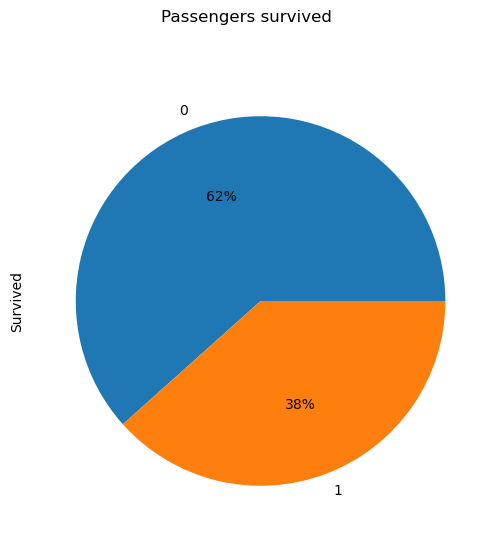

In [11]:
#selvinneiden vs ei-selvinneiden osuus
ax = df['Survived'].value_counts().plot.pie(subplots=True, figsize=(11, 6), autopct='%1.0f%%', title='Passengers survived')

In [12]:
#matkustajamäärät ikäryhmittäin
ranges = [0,10,20,30,40,50,60,70,80]
age_grouped = df['Age'].groupby(pd.cut(df.Age, ranges)).count()

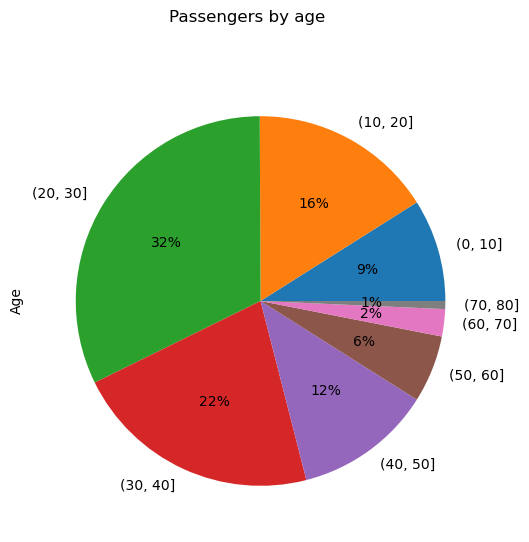

In [13]:
plot = age_grouped.plot.pie(subplots=True, figsize=(11, 6), autopct='%1.0f%%', title='Passengers by age')

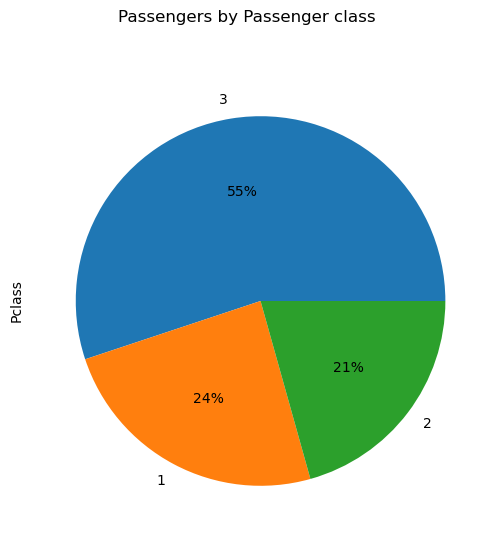

In [14]:
#matkustajat matkustusluokan mukaan
ax = df['Pclass'].value_counts().plot.pie(subplots=True, figsize=(11, 6), autopct='%1.0f%%', title='Passengers by Passenger class')

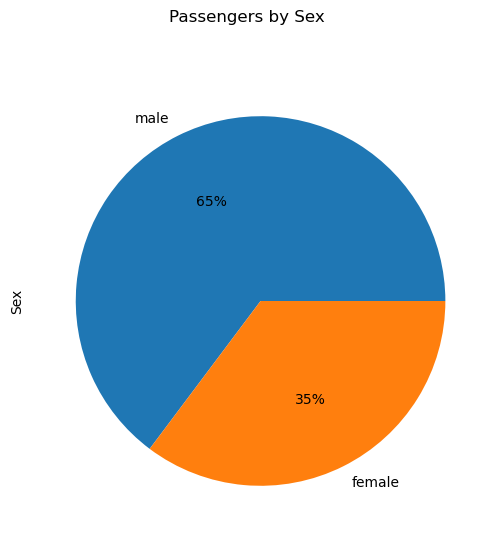

In [15]:
#matkustajat sukupuolen mukaan
ax = df['Sex'].value_counts().plot.pie(subplots=True, figsize=(11, 6), autopct='%1.0f%%', title='Passengers by Sex')

Pylväsdiagrammeilla saadaan havainnollistettua eri sukupuolten tai luokkien välisiä eroja, kuten piirakkakaaviolla. Pylväsdiagrammista voi olla selkeämpi havaita, kuinka isoja erot ovat määrällisesti.

Text(0, 0.5, 'Survived')

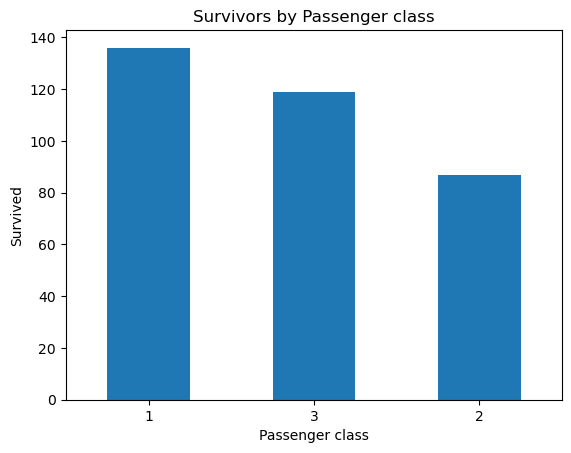

In [16]:
#selviytyneet matkustusluokan mukaan
ax = df[df['Survived'] == 1]['Pclass'].value_counts().plot.bar(x='Pclass', rot=0)
ax.set_title('Survivors by Passenger class')
plt.xlabel('Passenger class')
ax.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

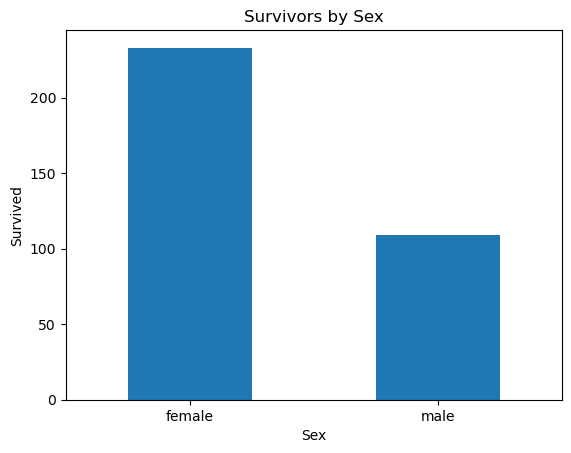

In [17]:
#selviytyneet sukupuolen mukaan
ax = df[df['Survived'] == 1]['Sex'].value_counts().plot.bar(x='Pclass', rot=0)
ax.set_title('Survivors by Sex')
plt.xlabel('Sex')
ax.set_ylabel('Survived')

Yhdistämällä erilaisia muuttujia samaan kuvaajaan voidaan verrata yhtä aikaa useampaa muuttujaa, kuten matkustajan selviytymistä sukupuolen ja matkustusluokan mukaan. Jos yhdistetään samaan pylväskuvaajaan sukupuolittain matkustajat kokonaisuudessaan sekä selvinneet matkustajat sukupuolittain, nähdään hyvinkin selvästi, että vaikka miehiä matkusti enemmän, heitä selvisi vähemmän. Samalla tavalla voidaan verrata matkustajien kokonaismäärää selviytyneiden määrään matkustusluokittain. Nähdään, että joka luokasta selvisi +- 100-matkustajaa, vaikka 3. luokassa matkustajia on huomattavasti muita luokkia enemmän - yli tuplaten 1. ja 2. luokkaan verrattuna. Pylväskuvaajasta tämä nähdään nopeasti yhdellä vilkaisulla.

Voidaan myös yhdistaa esimerkiksi ikä ja sukupuoli samaan kuvaajaan, jolloin nähdään sukupuolen mukaan minkä ikäisiä matkustajia laivalla on ollut. Lähes kaikissa ikäluokissa miehiä on enemmän kuin naisia. Vain lasten kohdalla tyttöjä on ollut enemmän joissain ikäluokissa. Yhdistämällä sisarukset + vanhemmat + lapset saadaan luotua perhekokoja ja verrattua selviytymistodennäköisyyttä perhekokoon.

In [18]:
survived_df = df[df.Survived == 1] #erotellaan datasta selvinneet
survived_df = survived_df[['Pclass', 'Sex']] #valitaan datasta matkustajaluokka & sukupuoli
survived_df.head(5)

,Pclass,Sex
PassengerId,,
2,1,female
3,3,female
4,1,female
9,3,female
10,2,female


In [19]:
survived1 = survived_df[survived_df['Pclass'] == 1]['Sex'].value_counts() #ykkösluokan selvinneet sukupuolittain
survived2 = survived_df[survived_df['Pclass'] == 2]['Sex'].value_counts() #kakkosluokan selvinneet sukupuolittain
survived3 = survived_df[survived_df['Pclass'] == 3]['Sex'].value_counts() #kolmosluokan selvinneet sukupuolittain

In [20]:
#selvinneet sukupuolittain eri luokissa dataframeiksi
df_pclass1 = pd.DataFrame({'Pclass1': survived1}).T
df_pclass2 = pd.DataFrame({'Pclass2': survived2}).T
df_pclass3 = pd.DataFrame({'Pclass3': survived3}).T

In [21]:
#yhdistetaan selvinneet sukupuolen ja luokan mukaan yhteen dataframeen
survivors_df = pd.concat([df_pclass1, df_pclass2, df_pclass3], ignore_index=False, sort=False)
survivors_df

,female,male
Pclass1,91,45
Pclass2,70,17
Pclass3,72,47


Text(0, 0.5, 'Survived')

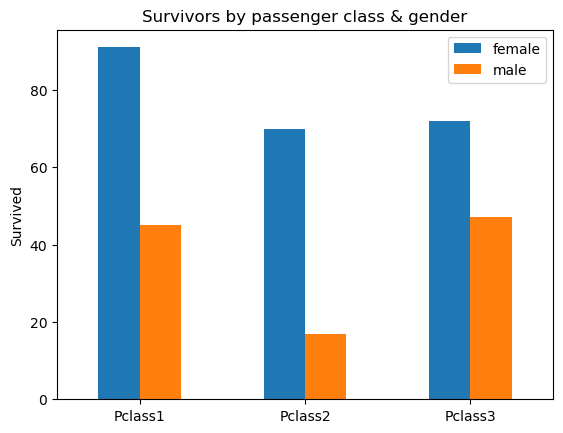

In [22]:
ax = survivors_df.plot.bar(rot=0)
ax.set_title('Survivors by passenger class & gender')
ax.set_ylabel('Survived')

In [23]:
passengers_by_sex = df['Sex'].value_counts() #matkustajat sukupuolen mukaan
survived_by_sex = df[df['Survived'] == 1]['Sex'].value_counts() #selvinneet sukupuolen mukaan

In [24]:
#dataframeiksi
df_passengers_by_sex = pd.DataFrame({'Passengers': passengers_by_sex}).T
df_survived_by_sex = pd.DataFrame({'Survivors': survived_by_sex}).T

In [25]:
#yhdistetään dataframet
gender_df = pd.concat([df_passengers_by_sex, df_survived_by_sex], ignore_index=False, sort=False).T
gender_df

,Passengers,Survivors
male,577,109
female,314,233


Text(0, 0.5, 'Survived')

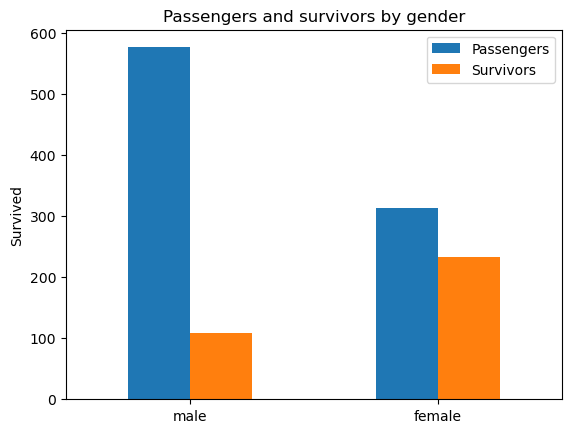

In [26]:
#matkustajien ja selvinneiden suhde sukupuolen mukaan. 
#Huomataan, että miehiä selvisi suhteessa huomattavasti vähemmän kuin naisia, vaikka miehiä matkusti huomattavasti enemmän.
ax = gender_df.plot.bar(rot=0)
ax.set_title('Passengers and survivors by gender')
ax.set_ylabel('Survived')

In [27]:
passengers_by_pclass = df['Pclass'].value_counts() #matkustajat luokan mukaan
survived_by_pclass = df[df['Survived'] == 1]['Pclass'].value_counts() #selvinneet luokan mukaan

#dataframeiksi
df_passengers_by_pclass = pd.DataFrame({'Passengers': passengers_by_pclass}).T
df_survived_by_pclass = pd.DataFrame({'Survivors': survived_by_pclass}).T

#yhdistetään dataframet
pclass_df = pd.concat([df_passengers_by_pclass, df_survived_by_pclass], ignore_index=False, sort=False).T
pclass_df = pclass_df.sort_index() #jotta saadaan järjestys luokkien mukaan, jotka tässä tapauksessa ovat dataframen indexinä
pclass_df

,Passengers,Survivors
1,216,136
2,184,87
3,491,119


Text(0, 0.5, 'Survived')

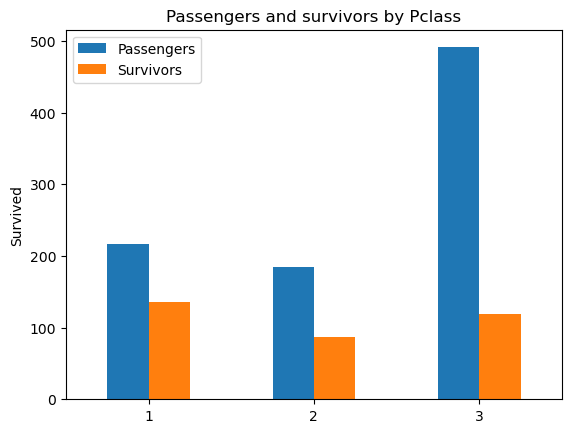

In [28]:
#matkustajien ja selvinneiden suhde sukupuolen mukaan. 
#Huomataan, että jokaisesta luokasta selvinneitä oli suunnilleen saman verran, vaikka kolmannessa luokassa matkustajia oli huomattavasti enemmän
ax = pclass_df.plot.bar(rot=0)
ax.set_title('Passengers and survivors by Pclass')
ax.set_ylabel('Survived')

<Axes: xlabel='Survived', ylabel='Pclass'>

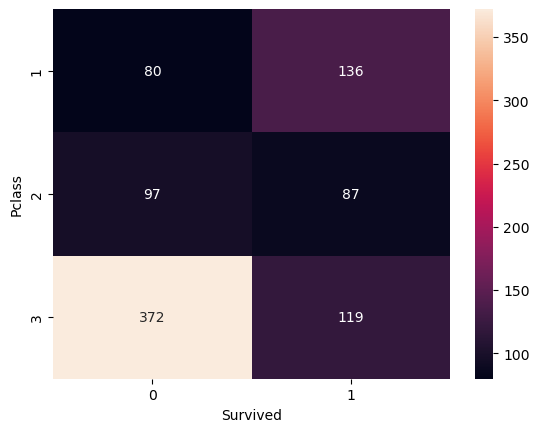

In [29]:
#ryhmitellään matkustajat luokan mukaan
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
#heatmap selviytyneistä luokan mukaan:
sns.heatmap(pclass_survived, annot = True, fmt ="d")

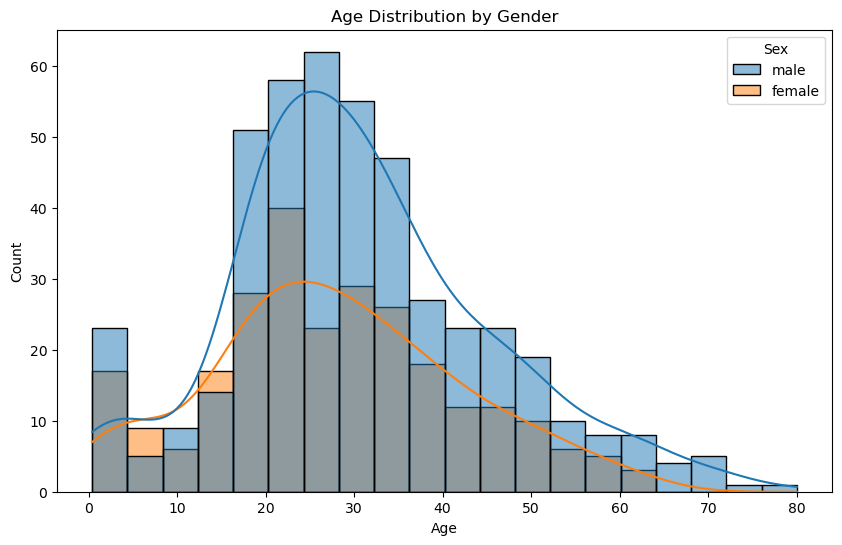

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True, hue='Sex')
plt.title('Age Distribution by Gender')
plt.show()

C:\Users\Maria\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


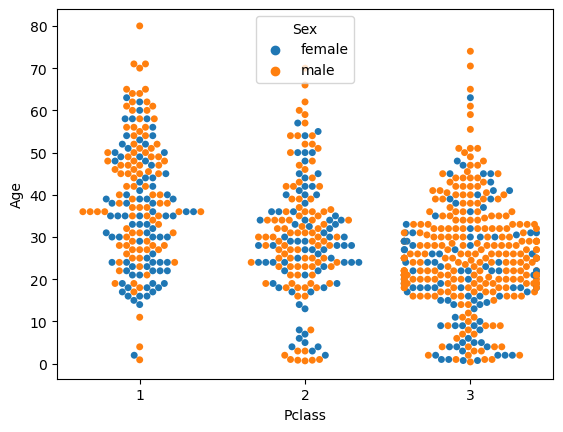

In [31]:
#matkustajat sukupuolen, iän ja luokan mukaan
sns.swarmplot(x='Pclass', y='Age', hue='Sex', data=df)
plt.show()

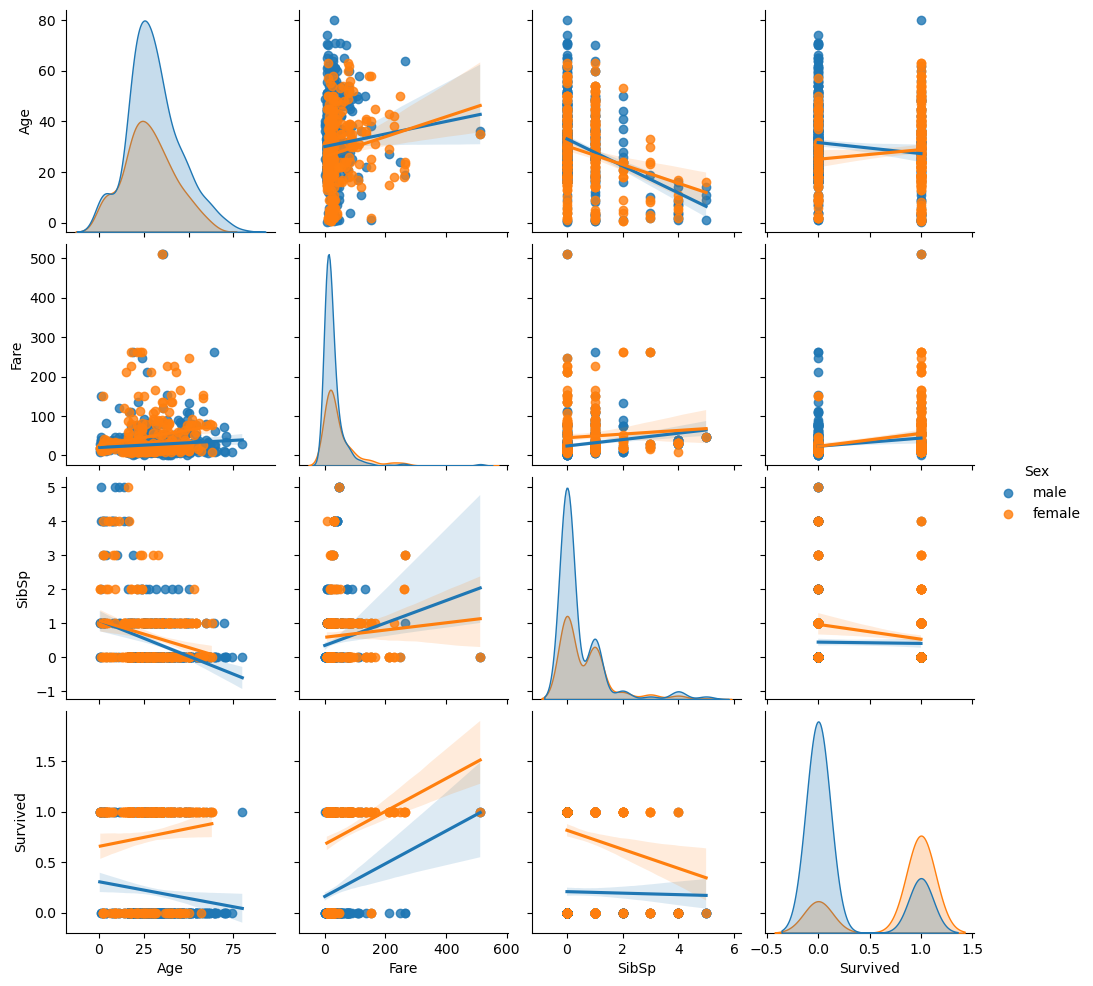

In [32]:
#muuttujaparien vertailu sukupuolittain: ikä, lippuhinta, sisarukset laivalla, selviytyminen
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Survived', 'Sex']].dropna(), kind='reg', hue='Sex')
plt.show()

### 2.5 Outlier Detection
One important step for the Quality of the data is to implement **Outlier Detection** from the data.

Notes on how to detect outliers?

* You can detect outliers using **visual inspection** of the dataset by creating scatter plots, histograms, box plots etc.
* You can use statistical Methods like **Z-Score** or **IQR**.

Z-Score: Calculate the z-score for each data point. If the z-score is significantly different from zero (> 2 or < -2), it may be an outlier.

Using the IQR, the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR.
The Q1 is the 25th percentile, and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1).

In [33]:
low = .05
high = .95
df_table = df.quantile([low, high])
df_table

,Survived,Pclass,Age,SibSp,Parch,Fare
0.05,0.0,1.0,4.0,0.0,0.0,7.22500
0.95,1.0,3.0,56.0,3.0,2.0,112.07915


In [34]:
import scipy.stats as stats
df_zscore = df.select_dtypes(include='number').apply(stats.zscore)
print(df_zscore.head())

             Survived    Pclass  Age     SibSp     Parch      Fare
PassengerId                                                       
1           -0.789272  0.827377  NaN  0.432793 -0.473674 -0.502445
2            1.266990 -1.566107  NaN  0.432793 -0.473674  0.786845
3            1.266990  0.827377  NaN -0.474545 -0.473674 -0.488854
4            1.266990 -1.566107  NaN  0.432793 -0.473674  0.420730
5           -0.789272  0.827377  NaN -0.474545 -0.473674 -0.486337


In [35]:
mean = np.mean(df) 
std = np.std(df) 
print('mean of the dataset is', mean) 
print('std. deviation is', std) 

mean of the dataset is Survived     0.383838
Pclass       2.308642
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64
std. deviation is Survived     0.486319
Pclass       0.835602
Age         14.516321
SibSp        1.102124
Parch        0.805605
Fare        49.665534
dtype: float64


Scatterplot on selkeä tapa huomata muuttujia datasta. Jos havainnollistetaan esimerkiksi lippujen hintoja luokan mukaan, voidaan huomata erilleen "pomppaavia" hintoja massan seasta. Tässä tapauksessa huomataan, että lippujen hinnoissa on pari poikkeuksellisen kallista lippua. Voisi olettaa, että nämä ovat jollain tapaa virheellisiä tai muuten poikkeuksellisia tietoja datassa.

IQR-metodilla myös huomataan, että hinnan osalta lipuissa on muutama poikkeama, kun laitetaan prosenteiksi 5 & 95. Jos prosenteiksi asetettiin 25 & 75, oli poikkeamia todella paljon, joka ei vaikuta kovinkaan uskottavalle. 

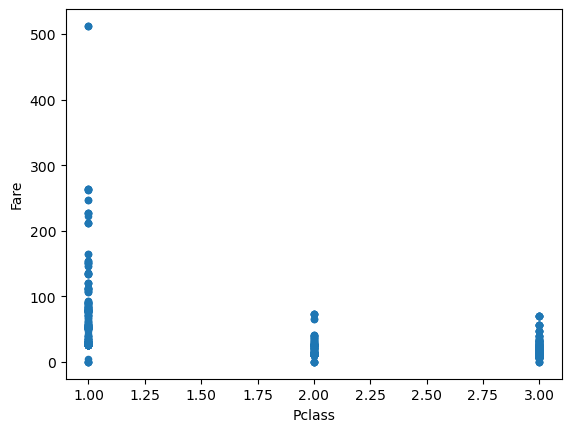

In [36]:
#tehdään scatter plot hintojen lippuhintojen suhteesta matkustusluokkaan
ax_pclass_fare = df.plot.scatter(x='Pclass',
                 y='Fare')

#kuvaajasta voidaan nähdä selvästi mm. muista poikkeava yli 500-hintainen lippukustannus luokassa 1

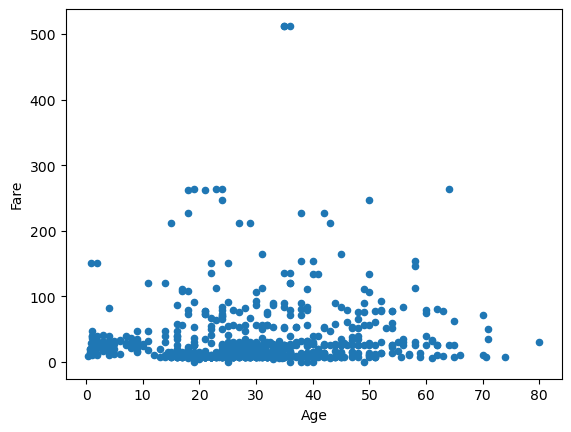

In [37]:
#voidaan myös verrata iän suhdetta lippuhintoihin, jolloin huomataan jälleen pari muista selvästi poikkeavaa hintaa

ax_pclass_fare = df.plot.scatter(x='Age',
                 y='Fare')

In [38]:
# IQR hinnoille 25% & 25%
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Nostetaan esiin poikkeamat ja huomataan, että poikkeama on todella paljon. Todellisuudessa näin moni ei varmasti ole poikkeama, joten voisi kokeilla samaa pienemmillä prosenteilla.
threshold = 1.5
outliers_fare = df[(df['Fare'] < Q1 - threshold * IQR) | (df['Fare'] > Q3 + threshold * IQR)]
outliers_fare

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...
847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [39]:
# IQR hinnoille 25% & 25%
Q1 = df['Fare'].quantile(0.05)
Q3 = df['Fare'].quantile(0.95)
IQR = Q3 - Q1

# Nostetaan esiin poikkeamat ja huomataan lopputuloksessa jälleen nuo pari erottuvaa yli 500-hintaista lippua
threshold = 1.5
outliers_fare = df[(df['Fare'] < Q1 - threshold * IQR) | (df['Fare'] > Q3 + threshold * IQR)]
outliers_fare

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [40]:
# IQR ikä
Q1 = df['Age'].quantile(0.05)
Q3 = df['Age'].quantile(0.95)
IQR = Q3 - Q1

# Nostetaan esiin poikkeamat ja huomataan, ettei iän kohdalla ole tällaisia arvoja, jos otetaan prosenteiksi 5 & 95
threshold = 1.5
outliers_age = df[(df['Age'] < Q1 - threshold * IQR) | (df['Age'] > Q3 + threshold * IQR)]
outliers_age

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [41]:
# IQR ikä
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Muuttamalla prosentteja saadaan jo poikkeamia, jotka toisaalta näin suurilla prosenteilla ei välttämättä ole enää poikkeama, vaan vain matkustajien ikien ääripäitä
threshold = 1.5
outliers_age2 = df[(df['Age'] < Q1 - threshold * IQR) | (df['Age'] > Q3 + threshold * IQR)]
outliers_age2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S


## Phase 3: Data preprocessing (max. 4 points)

Data preprocessing is an important step to ensure your dataset is ready for machine learning phase.
Here are your most important tasks for data preprocessing phase with the Titanic dataset.

1. Handling Missing Values. You should decide how to handle missing values.
2. Feature engineering. You can create new features or transform existing ones. With this dataset, you can extract titles from passenger names, create a family size feature, have a passenger a cabin or not, or categorize age and fare into groups.
3. Visualization: Do visualization with new features. And also recalculate statistics after data is preprocessed.
4. Categorical Variable Encoding. You need to encode categorical variables for a Machine Learning model. Select method from one-hot encoding, label encoding, or ordinal encoding.
5. Feature Scaling. Scaling features, such as age or fare. Select standardization or min-max scaling method for scaling.

### 3.1 Handling Missing Values
NaN values are big problems for ML models. 
You should find the way to handle NaN values in this dataset.

Datassa esiintyvät NaN-arvot voidaan joko täyttää tai tiputtaa kokonaan pois. Tässä tapauksessa NaN-arvoja oli joissain sarakkeissa niin paljon, että ne kannattaa täydentää, eikä tiputtaa pois.

In [42]:
df = df.ffill(axis=0) #täydennetään NaN-arvot

### 3.2 Feature engineering

You can create new features or transform existing ones.

Some ideas what new features/columns to create.

* Create a new feature `HasCabin` (has a cabin or not).
* Create a new feature `HasEmbarked` (has an embarkation port or not).
* Extract `ticketNumber` and `price` features of tickets.
* Create a new feature `FamilySize`.
* Create a new feature `Deck` from `Cabin` column.
* Extract a new feature `title` from the `Name`.
* More ideas from you.

Extra Question: Are there any passengers who share the same ticket number?

Ominaisuuksien suunnittelu, tai datan esikäsittely on prosessi, jossa "manipuloidaan", eli valitaan, muunnetaan, yhdistetään ja manipuloidaan annettua raakadataa haluttujen muuttujien luomiseksi. Haluttuja muuttujia lyodaan analysointia tai ennustavaa mallintamista varten ja se on merkittävä osa koneoppimismallin kehittämisessä.

In [43]:
df['HasCabin'] = np.where(df.Cabin.isnull(), 'No', 'Yes')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S,Yes
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S,Yes


In [44]:
df['HasEmbarked'] = np.where(df.Embarked.isnull(), 'No', 'Yes')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,HasEmbarked
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,Yes
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,Yes
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S,Yes,Yes
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,Yes
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S,Yes,Yes


In [45]:
df['Familysize'] = df['SibSp'] + df['Parch'] + 1 #perhekoko = henkilö itse, eli 1 + sisarukset + vanhemmat/lapset
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,HasEmbarked,Familysize
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,Yes,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,Yes,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S,Yes,Yes,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,Yes,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S,Yes,Yes,1


In [46]:
df['Deck'] = df['Cabin'].astype(str).str[0]
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,HasEmbarked,Familysize,Deck
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,Yes,2,n
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,Yes,2,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S,Yes,Yes,1,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,Yes,2,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S,Yes,Yes,1,C


In [47]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,HasEmbarked,Familysize,Deck,Title
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,Yes,2,n,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,Yes,2,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S,Yes,Yes,1,C,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,Yes,2,C,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S,Yes,Yes,1,C,Mr


In [48]:
#EXTRA: useammin kuin kerran esiintyvät lippunumerot, eli kyllä, jotkut matkustajat jakavat saman lippunumeron. 
n = 1
values = df['Ticket'].value_counts()
values = values[values > n].index.tolist()
print(values)

['347082', 'CA. 2343', '1601', '3101295', 'CA 2144', '347088', 'S.O.C. 14879', '382652', 'LINE', 'PC 17757', '17421', '349909', '113760', '4133', '113781', 'W./C. 6608', '2666', '19950', '347077', 'C.A. 31921', 'PC 17572', 'C.A. 34651', '363291', 'F.C.C. 13529', '345773', '248727', '24160', '29106', 'SC/Paris 2123', '35273', '371110', '230080', 'PC 17760', '239853', 'PC 17582', '347742', '110152', '13502', '110413', 'PC 17755', 'PC 17558', '237736', '17474', 'PC 17758', 'PP 9549', 'S.O./P.P. 3', 'P/PP 3381', 'PC 17485', '2668', '2627', 'PC 17604', '2653', '2665', '113798', '31027', '2908', 'W./C. 6607', 'WE/P 5735', '35281', '113789', '244367', '231919', '110465', 'PC 17477', '2699', '367226', '113806', '230136', '111361', '113505', '113803', '370365', '364849', '358585', '250644', 'C.A. 37671', '250647', '16966', '36928', '113776', '392096', 'C.A. 33112', 'A/4 48871', 'STON/O2. 3101279', '2691', '2678', 'PC 17593', '7534', 'PC 17608', '11767', '347054', '243847', 'PC 17761', '28403', 

In [49]:
#matkustajien nimet, joiden lippunumero esiintyy useammin kuin kerran, eli 344 matkustajaa 891 matkustajasta jakaa lippunumeron
mask = df['Ticket'].isin(values)
print(df[mask]['Name'])

PassengerId
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
8                         Palsson, Master. Gosta Leonard
9      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                   Nasser, Mrs. Nicholas (Adele Achem)
11                       Sandstrom, Miss. Marguerite Rut
                             ...                        
877                        Gustafsson, Mr. Alfred Ossian
880        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
881         Shelley, Mrs. William (Imanita Parrish Hall)
886                 Rice, Mrs. William (Margaret Norton)
889             Johnston, Miss. Catherine Helen "Carrie"
Name: Name, Length: 344, dtype: object


In [50]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,HasEmbarked,Familysize,Deck,Title
PassengerId,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,No,Yes,2,n,Mr
2,1,1,female,38.0,1,0,71.2833,C,Yes,Yes,2,C,Mrs
3,1,3,female,26.0,0,0,7.9250,S,Yes,Yes,1,C,Miss
4,1,1,female,35.0,1,0,53.1000,S,Yes,Yes,2,C,Mrs
5,0,3,male,35.0,0,0,8.0500,S,Yes,Yes,1,C,Mr


### 3.3 Visualize new features

Do visualization with selected new features.

Some ideas what to visualize:
* Visualize based on ticket prefixes.
* Visualize based on ticket numbers.
* Show the survivors based on Pclass and embarkation port.
* Also, other new features/columns can be used to visualization.

Uusien ominaisuuksien myötä pystytään vertaamaan esimerkiksi selviytymistä matkustuskannen mukaan. Nähdään, että suhteutettuna matkustajamäärään kannelta C selvisi vähiten matkustajia.

In [51]:
passengers_by_deck = df['Deck'].value_counts() #matkustajat kannen mukaan
survived_by_deck = df[df['Survived'] == 1]['Deck'].value_counts() #selvinneet kannen mukaan

#dataframeiksi
df_passengers_by_deck = pd.DataFrame({'Passengers': passengers_by_deck}).T
df_survived_by_deck = pd.DataFrame({'Survivors': survived_by_deck}).T

#yhdistetään dataframet
deck_df = pd.concat([df_passengers_by_deck, df_survived_by_deck], ignore_index=False, sort=False).T
deck_df = pclass_df.sort_index() #jotta saadaan järjestys kannen mukaan, jotka tässä tapauksessa ovat dataframen indexinä
deck_df

,Passengers,Survivors
1,216,136
2,184,87
3,491,119


Text(0, 0.5, 'Survived')

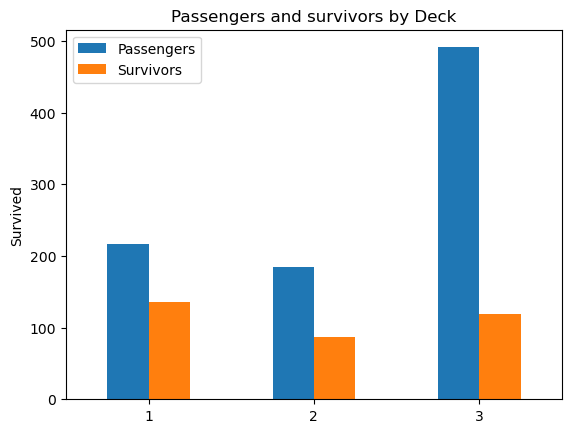

In [52]:
#matkustajien ja selvinneiden suhde kannen mukaan. 
#Huomataan, että 
ax = deck_df.plot.bar(rot=0)
ax.set_title('Passengers and survivors by Deck')
ax.set_ylabel('Survived')

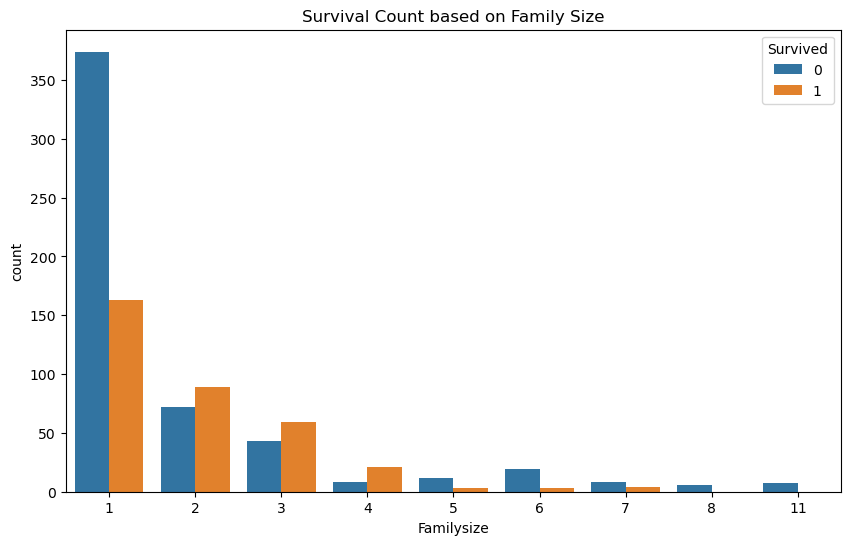

In [53]:
#selviäminen perhekoon mukaan
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Familysize', hue='Survived')
plt.title('Survival Count based on Family Size')
plt.show()

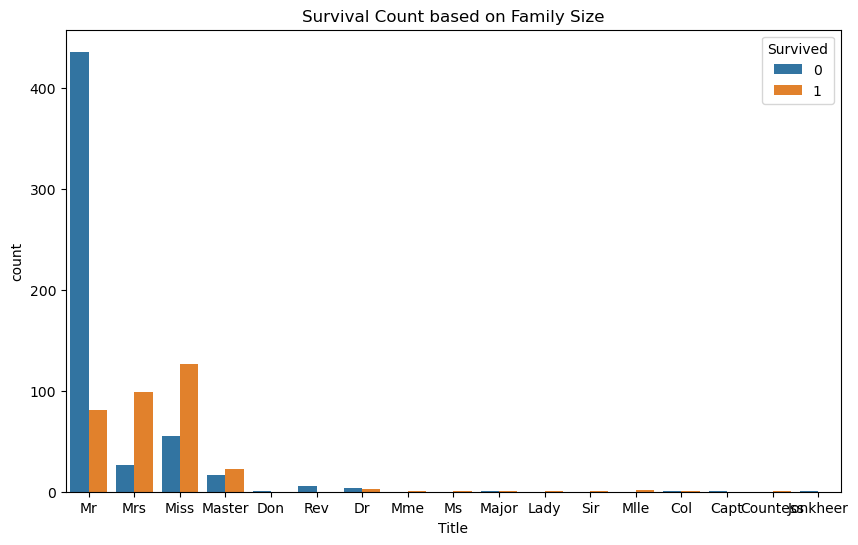

In [54]:
#selviäminen perhekoon mukaan
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Title', hue='Survived')
plt.title('Survival Count based on Family Size')
plt.show()

In [55]:
survived_df2 = df[df.Survived == 1] #erotellaan datasta selvinneet
survived_df2 = survived_df2[['Pclass', 'Embarked']] #valitaan datasta matkustajaluokka & satama
survived_df2.head(5)

,Pclass,Embarked
PassengerId,,
2,1,C
3,3,S
4,1,S
9,3,S
10,2,C


In [56]:
survived_emb1 = survived_df2[survived_df['Pclass'] == 1]['Embarked'].value_counts() #ykkösluokan selvinneet sataman mukaan
survived_emb2 = survived_df2[survived_df['Pclass'] == 2]['Embarked'].value_counts() #kakkosluokan selvinneet sataman mukaan
survived_emb3 = survived_df2[survived_df['Pclass'] == 3]['Embarked'].value_counts() #kolmosluokan selvinneet sataman mukaan

In [57]:
#selvinneet sukupuolittain eri sataman mukaan dataframeiksi
df_pclass_emb1 = pd.DataFrame({'Pclass1': survived_emb1}).T
df_pclass_emb2 = pd.DataFrame({'Pclass2': survived_emb2}).T
df_pclass_emb3 = pd.DataFrame({'Pclass3': survived_emb3}).T

In [58]:
#yhdistetaan selvinneet sukupuolen ja sataman mukaan yhteen dataframeen
survivors_pclass_emb_df = pd.concat([df_pclass_emb1, df_pclass_emb2, df_pclass_emb3], ignore_index=False, sort=False)
survivors_pclass_emb_df

,S,C,Q
Pclass1,74,60,2
Pclass2,76,9,2
Pclass3,67,25,27


Text(0, 0.5, 'Survived')

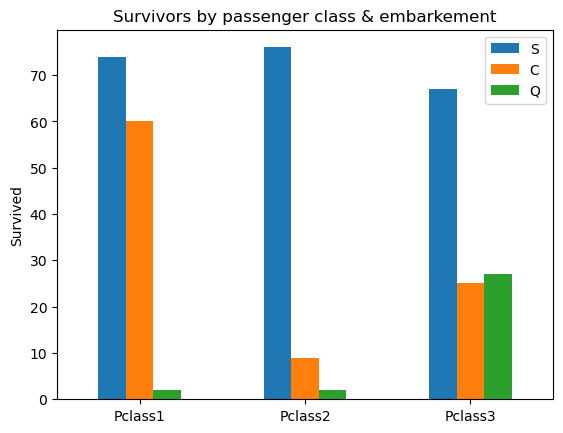

In [59]:
ax = survivors_pclass_emb_df.plot.bar(rot=0)
ax.set_title('Survivors by passenger class & embarkement')
ax.set_ylabel('Survived')

#havaitaan, että S-satamasta lähteneet selvisivät todennäköisimmin

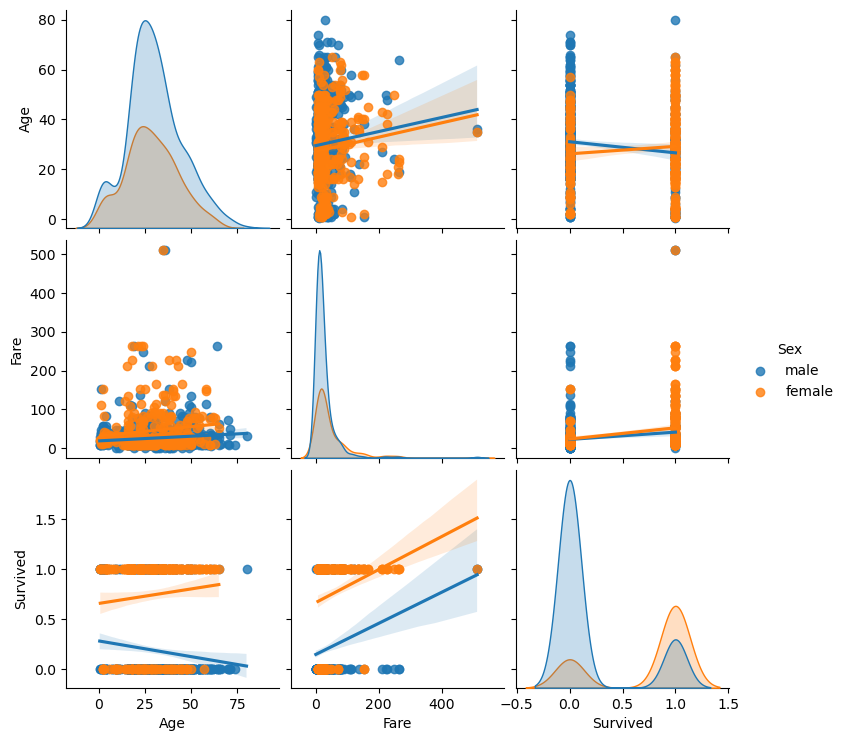

In [60]:
#muuttujaparien vertailu sukupuolittain: ikä, lippuhinta, kansi, selviytyminen
sns.pairplot(df[['Age', 'Fare', 'Deck', 'Survived', 'Sex']].dropna(), kind='reg', hue='Sex')
plt.show()

In [61]:
#tittelit sukupuolittain
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


### 3.4 Categorical Variable Encoding

Why Categorical Variable Encoding?

 * You need to encode categorical variables for a Machine Learning model.
 * Select your encoding method from these: one-hot encoding, label encoding, or ordinal encoding.

In [62]:
#koneoppimista varten sukupuoli, lähtösatama ym numeroksi

from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked', 'HasCabin', 'HasEmbarked', 'Deck', 'Title']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
    
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,HasEmbarked,Familysize,Deck,Title
PassengerId,,,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2,0,0,2,8,12
2,1,1,0,38.0,1,0,71.2833,0,1,0,2,2,13
3,1,3,0,26.0,0,0,7.9250,2,1,0,1,2,9
4,1,1,0,35.0,1,0,53.1000,2,1,0,2,2,13
5,0,3,1,35.0,0,0,8.0500,2,1,0,1,2,12


### 3.5 Feature Scaling

Why Feature Scaling?

* Scale all non numerical features for Machine Learning model.
* Features in your dataset might have different scales, which can vary widely.
* Most of the Machine Learning methods benefit from scaled features.

There are several common methods for feature scaling:

1. **Min-Max Scaling** scales features to a specific range (commonly 0 to 1 or -1 to 1).
2. **Standardization** (Z-Score) scales features to have a mean of 0 and a standard deviation of 1.
3. **Robust Scaling** uses the median and interquartile range to scale features.

In [63]:
#Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns = df.columns)
df_minmax.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,HasEmbarked,Familysize,Deck,Title
0,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,0.0,0.1,1.00,0.7500
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,0.0,1.0,0.0,0.1,0.25,0.8125
2,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,1.0,1.0,0.0,0.0,0.25,0.5625
3,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,1.0,1.0,0.0,0.1,0.25,0.8125
4,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,1.0,1.0,0.0,0.0,0.25,0.7500


## Phase 4: Modelling (max. 3 points)

Target is to do **Titanic Survival Prediction with Machine Learning**.
You should build and compare machine learning models for predicting passenger survival on the Titanic.

1. Data Splitting

* Split the dataset into training and testing sets (e.g., 80% training and 20% testing) to evaluate model performance.

2. Modeling

* Implement three different classifiers: Decision Tree, k-Nearest Neighbors (kNN), and Random Forest.
* Train each model on the training data.

3. Model Evaluation

* Evaluate the performance of each model on the testing data using evaluation metrics such as accuracy, precision and F1-score.

4. Comparison

* Compare the results of the three classifiers to determine which one performs the best in terms of survival prediction.

5. Conclusion

* Summarize your findings and provide insights into which model is most suitable for predicting Titanic passenger survival based on the dataset.
* Include visualizations and explanations to explain your findings.

Note: You may consider hyperparameter tuning for the classifiers and further data exploration to enhance your analysis.
You can find with hyperparameter tuning the best configuration for each model. This can significantly impact performance of your model.

### 4.0 Processing for ML phase

Select the features and target variable for an ML process.
Process rows with NaN values.

Kohdemuuttujaksi valitaan <b>selviäminen</b> (Survived). NaN-arvot on jo aiemmin käsitelty pois sekä käsitelty ei-numeeriset arvot numeerisiksi. Nimi on tiputettu pois aiemmin, koska ei ole oleellinen muuttuja enää tässä vaiheessa.

### 4.1 Data Splitting

Always Split the data into training and test sets.

Split the data into training and test sets.

Use the following properties for splitting in this assignment:

* `y` is the target variable to predict.
* `Test_size=0.2` specifies that 20% of the data will be used for testing.
* `Random_state=42` is used to set a seed for the random number generator, and it ensures that the split will be reproducible.
* `Stratify=y` ensures that the class distribution in the target variable is preserved in both the training and testing sets.

In [66]:
# X_train, X_test, y_train, y_test = train_test_split(..., test_size=0.2, random_state=42, stratify=y)
from sklearn.model_selection import train_test_split

y = df['Survived']
x=df.drop('Survived',axis=1)

X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

print(df.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(891, 13)
(712, 12)
(712,)
(179, 12)
(179,)


### 4.2 Modeling
Implement
* Decision Tree,
* k-Nearest Neighbors (kNN), and
* Random Forest ML models

to make predictions with data.

Create all three models. Then train the models and make predictions.

In [67]:
# Note! Use different variable names for different models and their results also. Otherwise it harder to compare these results.

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [69]:
#KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

81.74

In [70]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

99.58

In [71]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.58

#### 4.2.1 importance values
Show importance values of an ML learning process in descending order if it's possible with the ML method used.


Kun katsotaan eri muuttujien arvoa selviytymiseen nähden, huomataan että molemmilla malleilla (Decision tree & Random forest) nousee esille sukupuoli, lipun hinta ja ikä. 

             Importance
Feature                
Sex            0.304301
Age            0.221752
Fare           0.204625
Pclass         0.107217
Deck           0.072252
Familysize     0.028773
Title          0.024261
Embarked       0.016056
SibSp          0.013199
Parch          0.007564
HasCabin       0.000000
HasEmbarked    0.000000


<Axes: xlabel='Feature'>

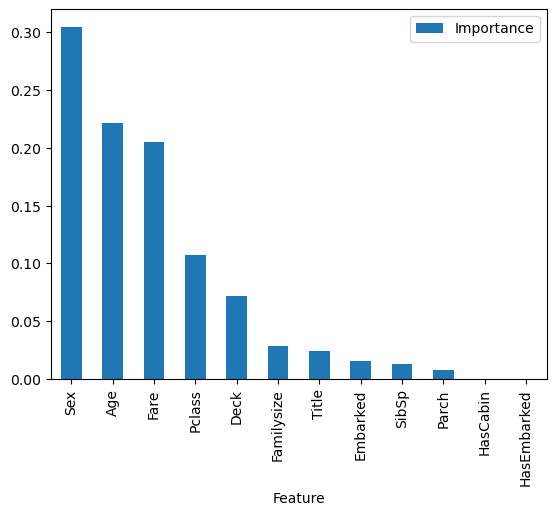

In [72]:
# Decision tree

# Koulutetaan
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

# Get feature importances
feature_importances = model.feature_importances_

# luodaan df
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# lajitellaan df
importances_df = importances_df.sort_values(by='Importance', ascending=False).set_index('Feature')

print(importances_df)
importances_df.plot.bar()

             Importance
Feature                
Fare           0.212803
Age            0.193331
Sex            0.172910
Title          0.123590
Deck           0.085977
Pclass         0.071680
Familysize     0.054995
Embarked       0.033612
SibSp          0.028776
Parch          0.022222
HasCabin       0.000104
HasEmbarked    0.000000


<Axes: xlabel='Feature'>

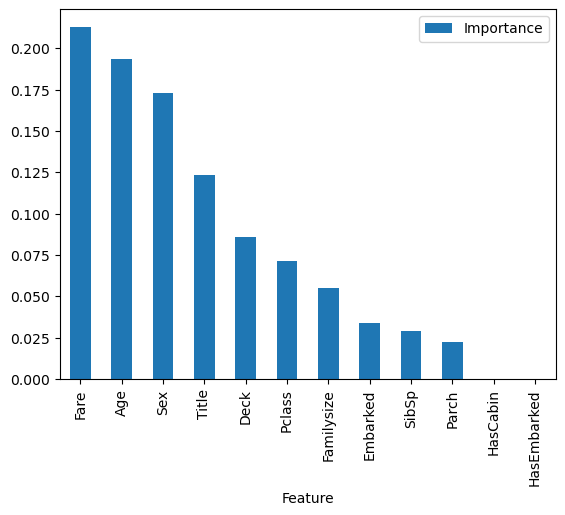

In [73]:
# Random forest

# Koulutetaan
model = RandomForestClassifier()
model.fit(X_train, Y_train)

feature_importances = model.feature_importances_

# luodaan df
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# lajitellaan df
importances_df = importances_df.sort_values(by='Importance', ascending=False).set_index('Feature')

print(importances_df)
importances_df.plot.bar()

### 4.3 Evaluate

Evaluate the performance of each three models.  Calculate metrics that can be compared.

Evaluate all the models.

In [74]:
models = pd.DataFrame({
    'Model': ['KNN', 'Random Forest', 'Decision Tree'],
    'Score': [acc_knn, acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,99.58
2,Decision Tree,99.58
0,KNN,81.74


Hämmennysmatriisin mukaan Random Forest -mallilla 386 matkustajaa oletettiin/ennustettiin oikein ei-eloonjääneiksi (true-negatives) ja 53 luokiteltiin väärin ei-eloonjääneiksi (false positives). Puolestaan selvinneiksi määritettiin väärin 82 matkustajaa (false negatives) ja puolestaan 191 määritettiin oikein selvinneiksi (true positives).

Decision Tree -mallilla puolestaan 355 matkustajaa oletettiin/ennustettiin oikein ei-eloonjääneiksi (true-negatives) ja 84 luokiteltiin väärin ei-eloonjääneiksi (false positives). Puolestaan selvinneiksi määritettiin väärin 88 matkustajaa (false negatives) ja puolestaan 185 määritettiin oikein selvinneiksi (true positives).

KNN-mallilla tulokset jäävät huonommiksi, kuten ylempänä oleva tilastokin näyttää. 353 matkustajaa oletettiin/ennustettiin oikein ei-eloonjääneiksi (true-negatives) ja 86 luokiteltiin väärin ei-eloonjääneiksi (false positives). Tämä ei juurikaan poikkea aiemmista malleista. Kuitenkin selvinneiksi määritettiin väärin 122 matkustajaa (false negatives) ja puolestaan 151 määritettiin oikein selvinneiksi (true positives). Tässä tulos alkaa jo olla huonompi.

In [75]:
#hämmennyskuvaaja Random Forest

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics

predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix_RF = metrics.confusion_matrix(Y_train, predictions)

confusion_matrix_RF

array([[386,  53],
       [ 82, 191]], dtype=int64)

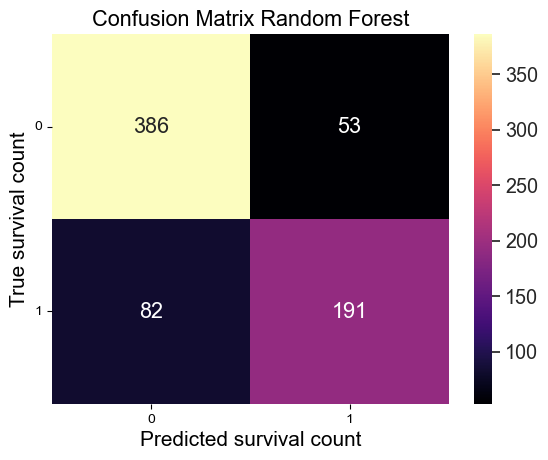

<Figure size 1000x700 with 0 Axes>

In [76]:
# luodaan kuvaaja

feature_names = x.columns
labels = y.unique()

# Input values for the confusion matrix
ax = plt.axes()
sns.set(font_scale = 1.3)
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix_RF, annot = True, fmt = "g", ax = ax, cmap = "magma")

# Add descriptive title for the figure and names for axles
ax.set_title('Confusion Matrix Random Forest')
ax.set_xlabel("Predicted survival count", fontsize = 15)
ax.set_xticklabels(labels)
ax.set_ylabel("True survival count", fontsize = 15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [77]:
#hämmennyskuvaaja Decision tree

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics

predictions = cross_val_predict(decision_tree, X_train, Y_train, cv=3)
confusion_matrix_DT = metrics.confusion_matrix(Y_train, predictions)

confusion_matrix_DT

array([[355,  84],
       [ 88, 185]], dtype=int64)

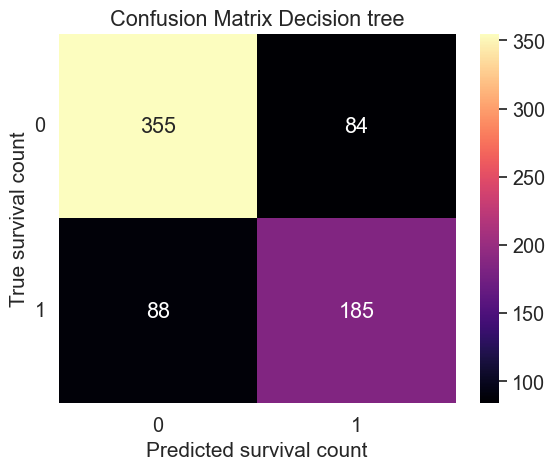

<Figure size 1000x700 with 0 Axes>

In [78]:
# luodaan kuvaaja

feature_names = x.columns
labels = y.unique()

# Input values for the confusion matrix
ax = plt.axes()
sns.set(font_scale = 1.3)
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix_DT, annot = True, fmt = "g", ax = ax, cmap = "magma")

# Add descriptive title for the figure and names for axles
ax.set_title('Confusion Matrix Decision tree')
ax.set_xlabel("Predicted survival count", fontsize = 15)
ax.set_xticklabels(labels)
ax.set_ylabel("True survival count", fontsize = 15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [79]:
#hämmennyskuvaaja KNN

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics

predictions = cross_val_predict(knn, X_train, Y_train, cv=3)
confusion_matrix_KNN = metrics.confusion_matrix(Y_train, predictions)

confusion_matrix_KNN

array([[353,  86],
       [122, 151]], dtype=int64)

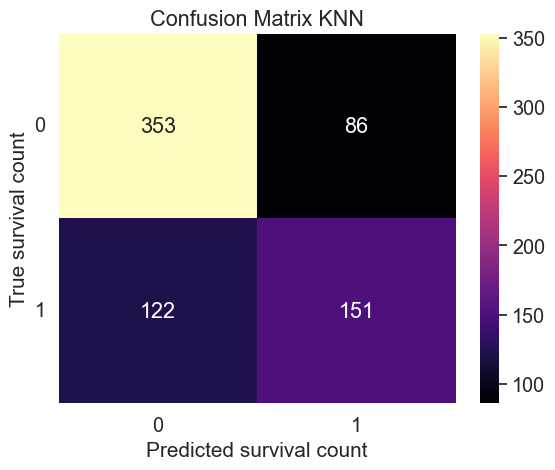

<Figure size 1000x700 with 0 Axes>

In [80]:
# luodaan kuvaaja

feature_names = x.columns
labels = y.unique()

# Input values for the confusion matrix
ax = plt.axes()
sns.set(font_scale = 1.3)
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix_KNN, annot = True, fmt = "g", ax = ax, cmap = "magma")

# Add descriptive title for the figure and names for axles
ax.set_title('Confusion Matrix KNN')
ax.set_xlabel("Predicted survival count", fontsize = 15)
ax.set_xticklabels(labels)
ax.set_ylabel("True survival count", fontsize = 15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

### 4.4 Comparison

Compare the results of the three classifiers.


Tämä on oikeastaan tehty jo ylempänä

### 4.5 Conclusion

Summarize your findings and provide insights into which model is most suitable for predicting Titanic passenger survival based on the dataset.

- <b>Sukupuoli</b>: naisten selviytymistodennäköisyys oli huomattavasti miehiä parempi, vaikka miehiä matkusti huomattavasti enemmän. Kyseisenä maailmanaikana naisten matkustaminen oli kulttuurillisesti harvinaisempaa.
- <b>Matkustajaluokka ja lähtösatama</b>: ensimmäisen luokan matkustajat selvisivät todennäköisemmin, josta voisi päätellä, että sosioekonominen asema vaikutti selviytymiseen. Samoin lähtösatamien väliset erot selviytymisessä voisivat viitata sosioekonomisen aseman vaikutukseen.
- <b>Perhekoko</b>: yksin matkustavat ja pienet perheet selvisivät onnettomuudesta suurperheitä todennäköisemmin. Yksin matkustavien tuskin tarvitsi yhtä paljon miettiä ja huolehtia muista ihmisistä, ja pystyi keskittymään omaan selviytymiseen.
- <b>Ikä</b>: Lasten selviytymistilasto oli korkeampi, kuin vanhusten, mikä viittaisi siihen, että lasten pelastamiseen panostettiin enemmän. Erityisen huono selviytymistilasto oli keski-ikäisillä miehillä, jotka todennäköisesti päätyivät pelastamaan muita ja auttamaan tilanteen korjaamisyrityksissä.
- <b>Kansi</b>: Jokaiselta kannelta selvisi suunnilleen saman verran ihmisiä, vaikka kolmannella kannella oli huomattavasti enemmän matkustajia. Lisätietojen avulla voitaisiin pohtia, johtuuko tämä esimerkiksi kannen sijainnista.

<b>Koneoppimismalleista</b> Random Forest ja Decision tree olivat parhaiten paikkansa pitäviä. Random Forest ennusti ei-eloonjääneet osuvammin, mutta Decision tree puolestaan ennusti eloonjääneet osuvammin. Yhteis"pisteiltään" nämä pääsivät tasoihin. 